In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('./drive/MyDrive/sharif/MachineLearning/ipython(guide)')

### Libs

In [3]:
! pip install scikit-multilearn

     |████████████████████████████████| 92kB 8.8MB/s 


In [4]:
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import plot_confusion_matrix,precision_score,recall_score,\
        classification_report,f1_score,confusion_matrix,plot_roc_curve
import matplotlib.pyplot as plt
import numpy
import time
import pandas
from joblib import dump,load
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import re
import ast


## 1 - Collecting Data


In [5]:
X  = pandas.read_csv('../Data/features.csv')
y = pandas.read_csv('../Data/preprocessed.csv')
# X  = pandas.read_csv('../Data/features_50.csv')
# y = pandas.read_csv('../Data/preprocessed_50.csv')
labels = []
tag=[]
for item in y['tag']:
  labels += re.sub('\"|\'| |=','',item.lower()).split(",")
  tag.append(re.sub('\"|\'| |=','',item.lower()).split(","))
labels = list(set(labels))
mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(tag)

In [ ]:
# for i in range(20):
#   print(i)
#   print(mlb.inverse_transform(numpy.array([Y[i]])))
#   print(y.iloc[i,1])

In [6]:
print(X.shape)
print(Y.shape)
print(len(labels))
class_num=len(labels)

(35667, 377)
(35667, 80)
80


## 2 - Spliting Data

In [ ]:
# X.sum(axis = 0, skipna = True).argmax()
# X[X < 2*X.mean(axis=1)].shape
# X_pr = X[X[X < 2*X.mean(axis=0)].all().index.values]
# X_pr.shape


In [ ]:
# wastes = [int(i) for i in list(X.sum(axis=0).nlargest(n=0).index)+ list(X.sum(axis=0).nsmallest(n=int(3027*0)).index)]
# all_columns = [i for i in range(len(X.columns))]
# cols = list(set(all_columns) - set(wastes))
# X_t = X[X.columns[cols]]

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X_t, Y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print('train: ', X_train.shape , '\ntest: ', X_test.shape , '\nval: ', X_val.shape , )

train:  (21399, 377) 
test:  (7134, 377) 
val:  (7134, 377)


## 3 - EDA

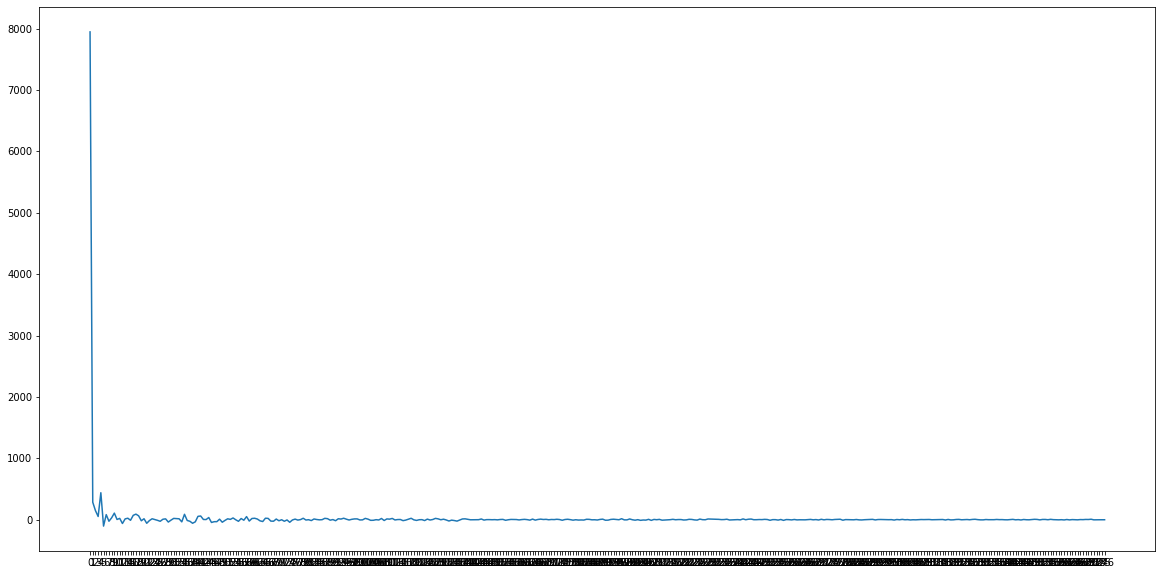

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))  
s = X.sum(axis = 0, skipna = True)
ax.plot(s)

Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_val=scaling.transform(X_val)
X_test = scaling.transform(X_test)

## 4 - Model Selection

SVC

One vs. Rest

In [9]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# clf_SVC_basic = svm.SVC(kernel="rbf")
# clf_SVC_OneVsRest = OneVsRestClassifier(estimator=clf_SVC_basic)
# clf_SVC = clf_SVC_OneVsRest.fit(X_train,y_train)
# dump(clf_SVC, 'clf_SVC_scaled.joblib')

In [10]:
# clf_SVC = load('clf_SVC.joblib') # Loading trained model
clf_SVC = load('clf_SVC_scaled.joblib') # Loading scaled trained model

In [ ]:
y_pred_SVC_1 = clf_SVC.predict(X_val)

In [ ]:
print('accuracy: ',accuracy_score(y_val, y_pred_SVC_1))
print('f1: ',f1_score(y_val, y_pred_SVC_1,average='weighted'))

print(classification_report(y_val, y_pred_SVC_1))

One vs. One

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
# clf_SVC_basic = svm.SVC(kernel="rbf")
# clf_SVC_OneVsOne = OneVsOneClassifier(estimator=clf_SVC_basic)
# clf_SVC = clf_SVC_OneVsOne.fit(X_train,y_train)
# dump(clf_SVC, 'clf_SVC_oneVSone.joblib')

In [ ]:
y_pred_SVC_2 = clf_SVC.predict(X_val)

In [ ]:
print('accuracy: ',accuracy_score(y_val, y_pred_SVC_1))
print('f1: ',f1_score(y_val, y_pred_SVC_1,average='weighted'))

print(classification_report(y_val, y_pred_SVC_1))

accuracy:  0.2617045135968601
f1:  0.3052639604271228
              precision    recall  f1-score   support

           0       0.72      0.15      0.24       123
           1       0.67      0.52      0.58       732
           2       0.00      0.00      0.00        22
           3       0.69      0.31      0.43       277
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        13
           7       0.69      0.08      0.14       293
           8       1.00      0.02      0.03        61
           9       1.00      0.13      0.24        45
          10       0.00      0.00      0.00       125
          11       0.64      0.17      0.27       200
          12       0.00      0.00      0.00         6
          13       1.00      0.36      0.53        14
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        11
          16       0.67    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf_SVC.decision_function(X_val)
for i in range(Y[0].shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

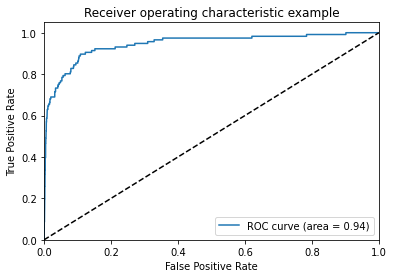

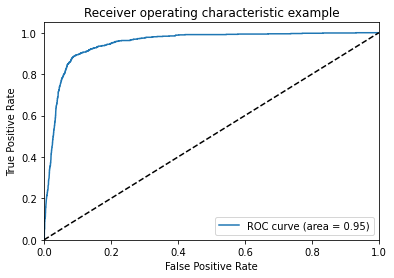

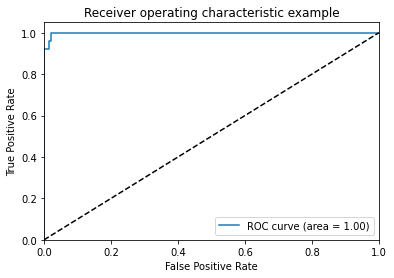

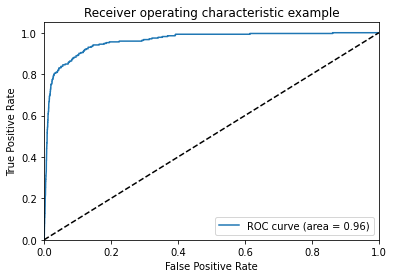

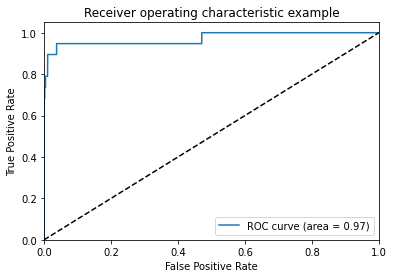

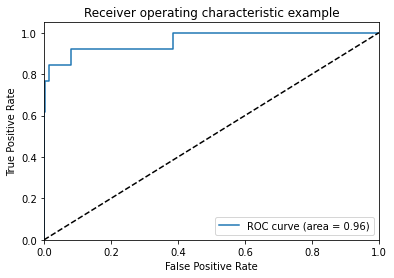

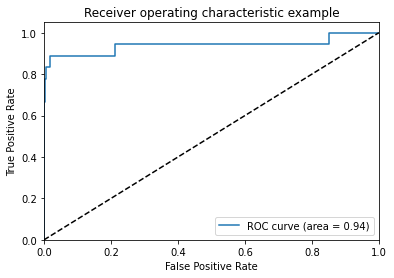

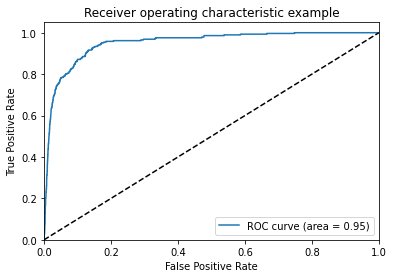

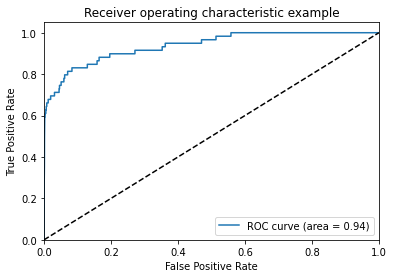

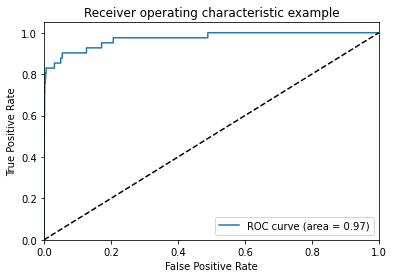

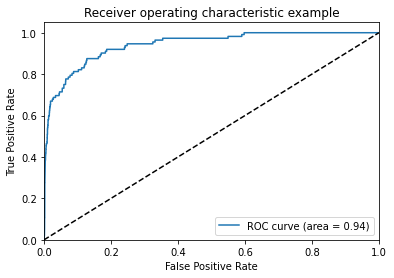

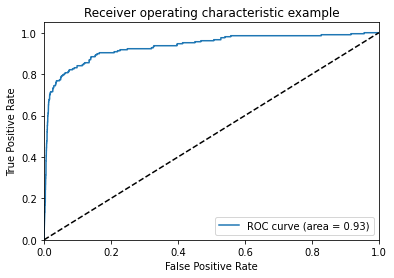

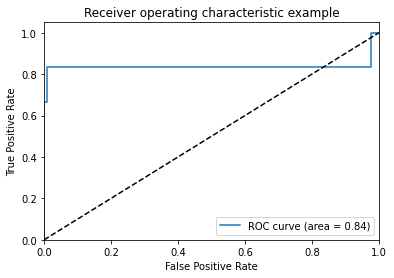

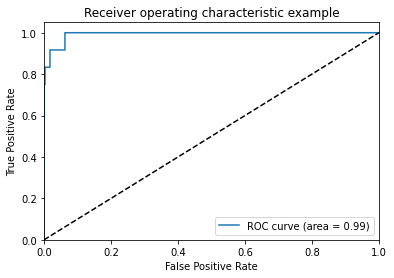

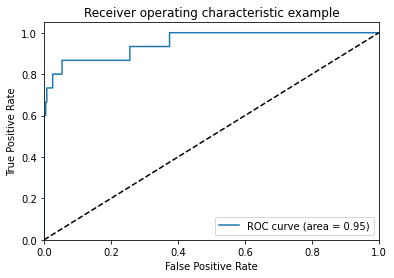

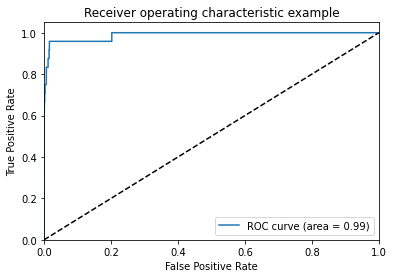

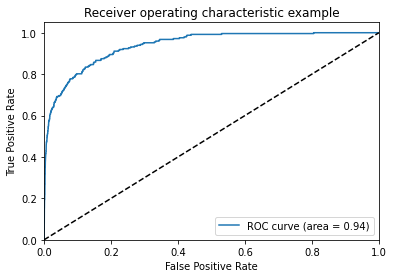

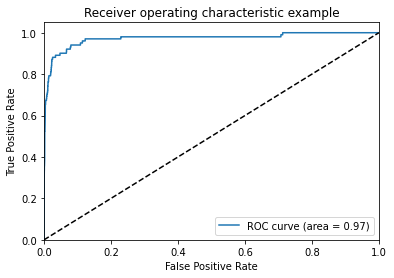

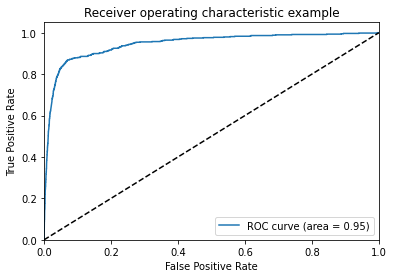

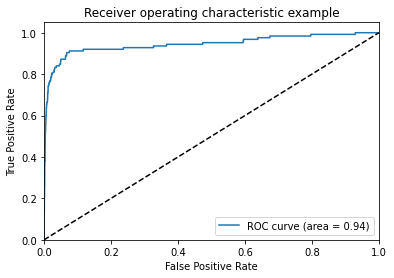

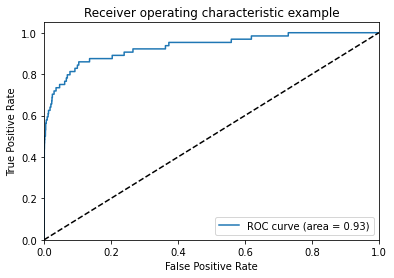

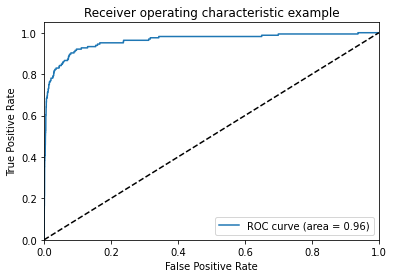

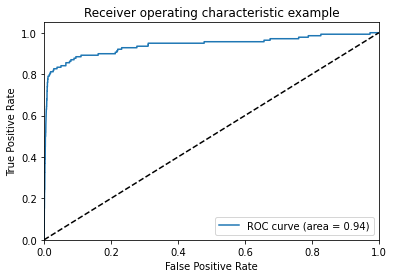

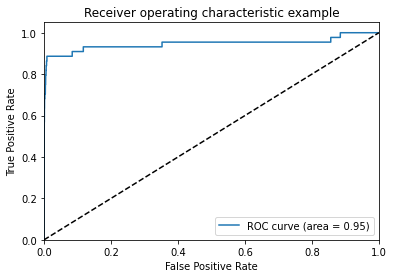

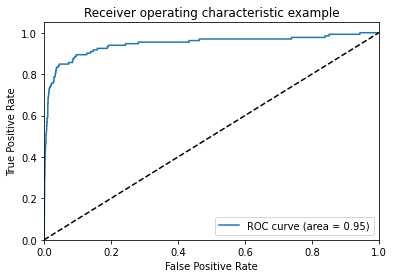

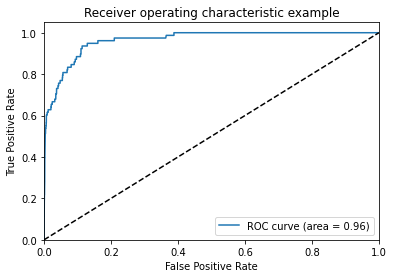

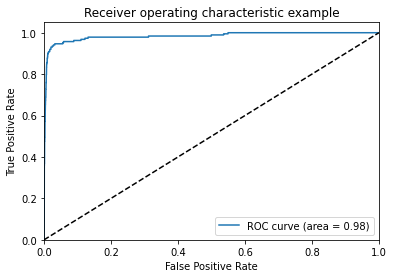

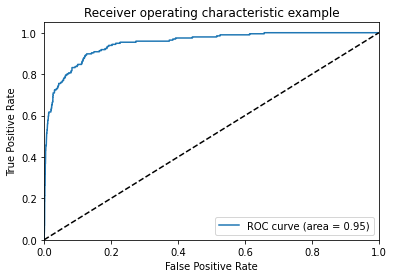

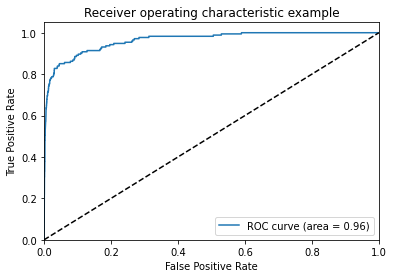

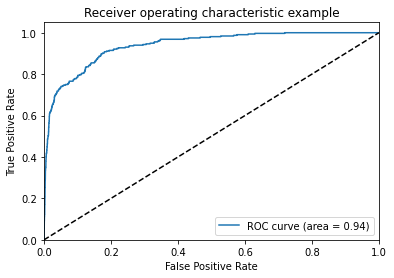

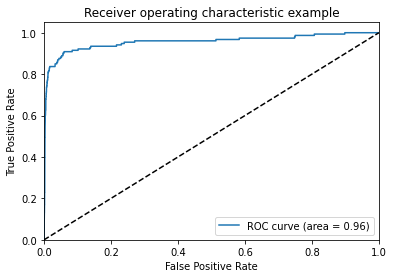

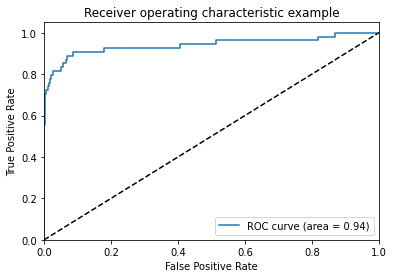

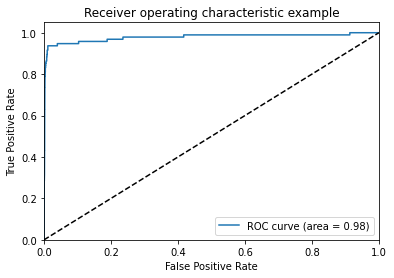

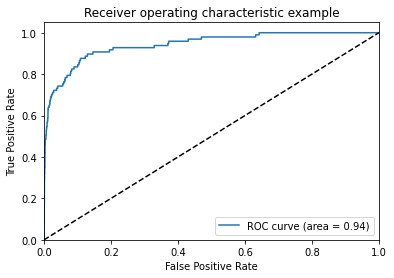

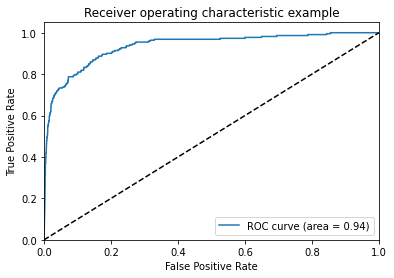

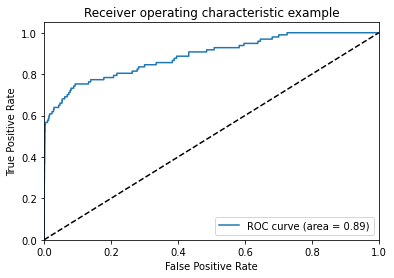

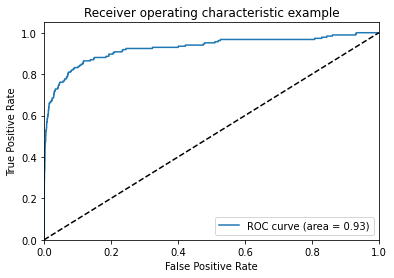

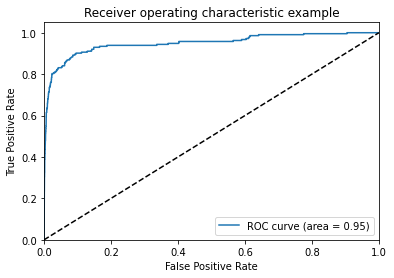

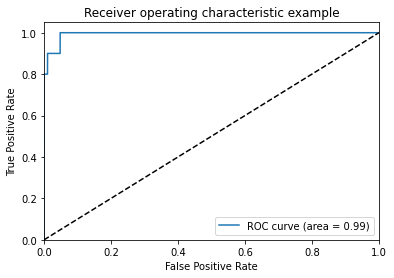

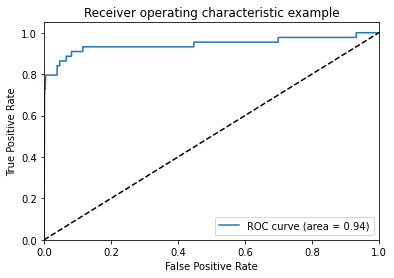

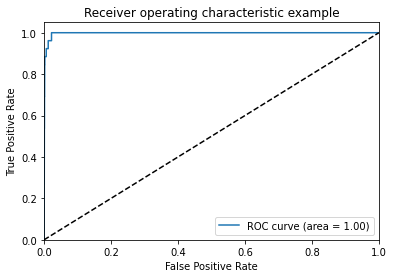

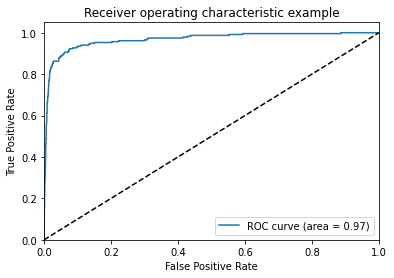

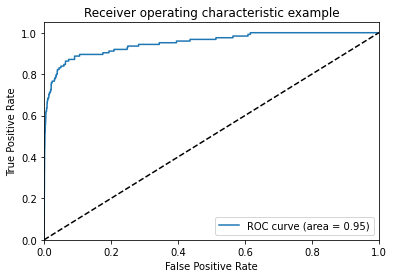

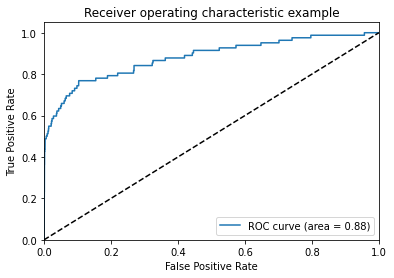

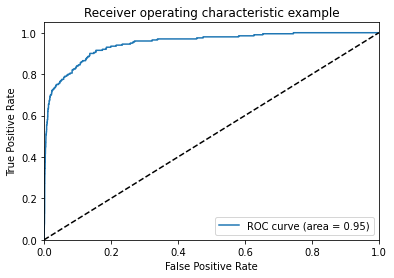

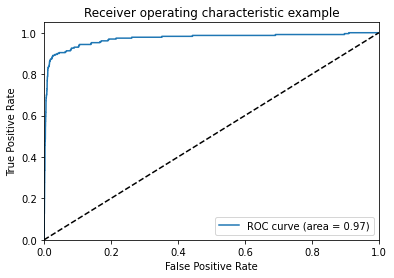

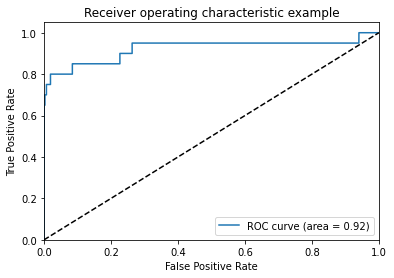

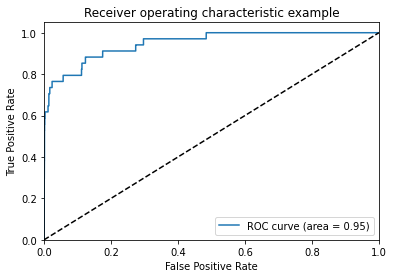

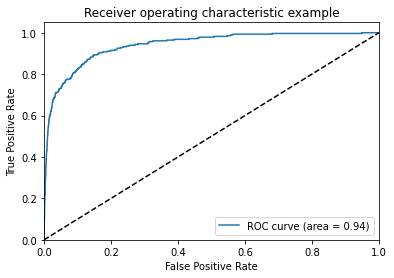

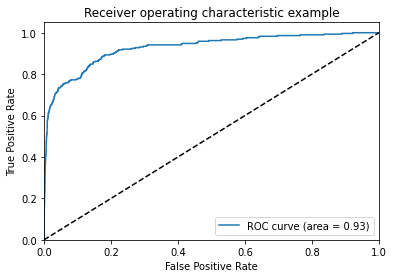

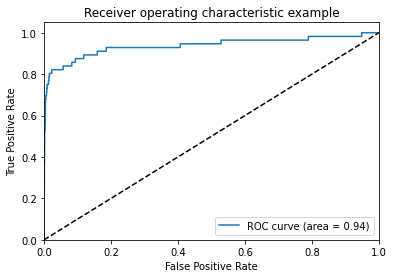

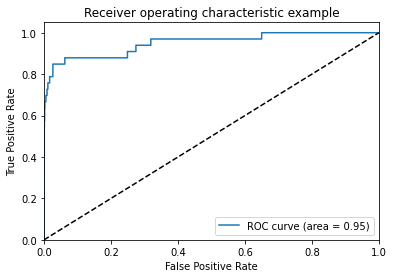

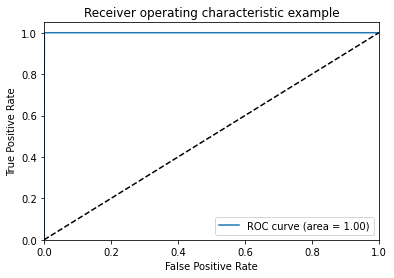

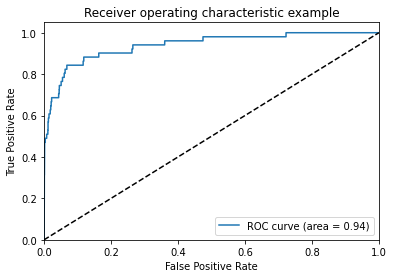

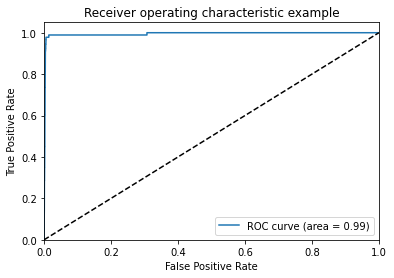

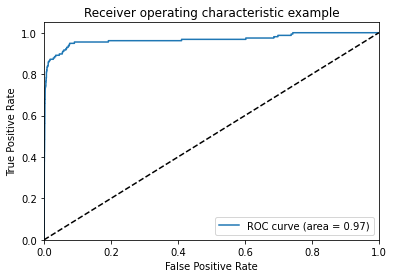

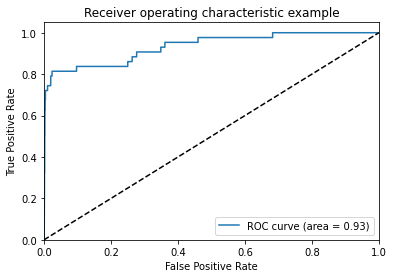

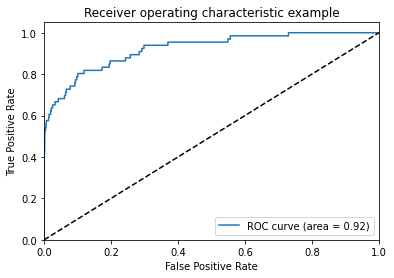

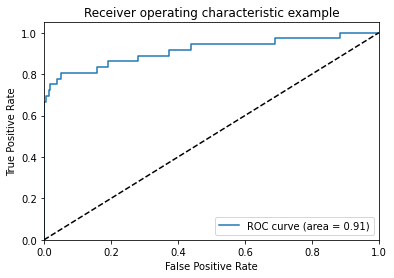

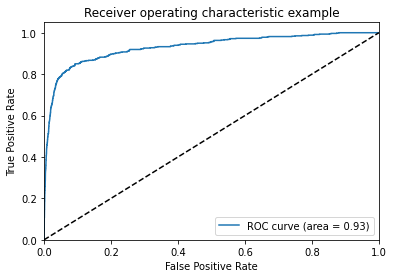

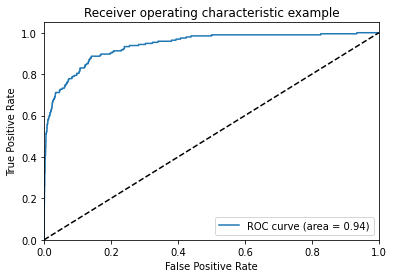

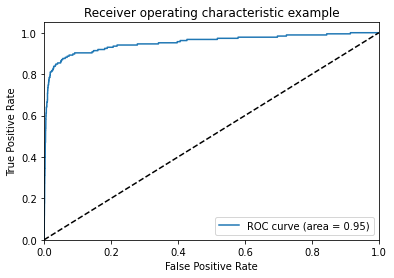

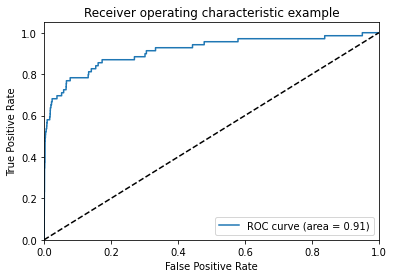

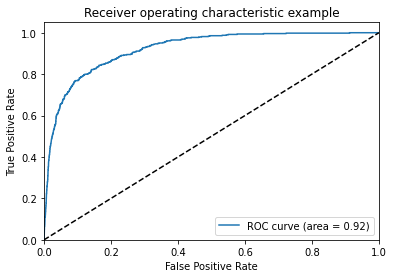

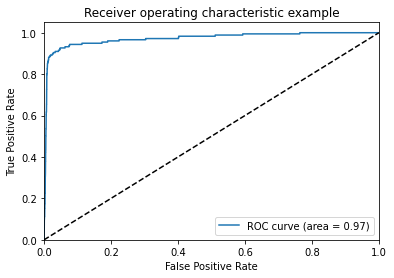

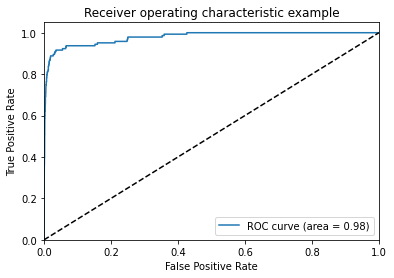

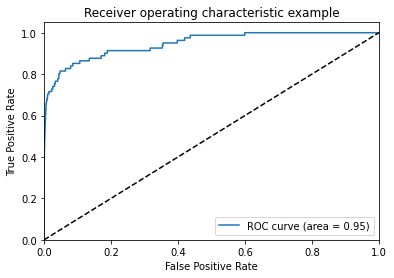

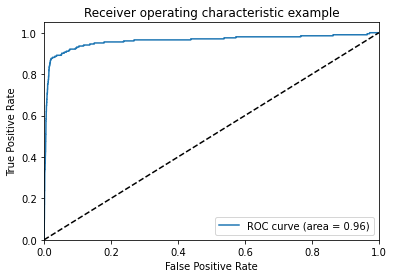

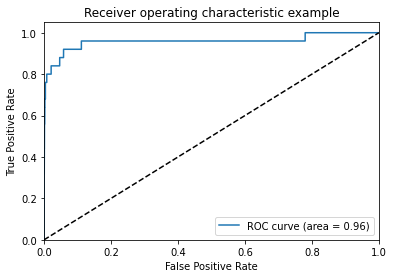

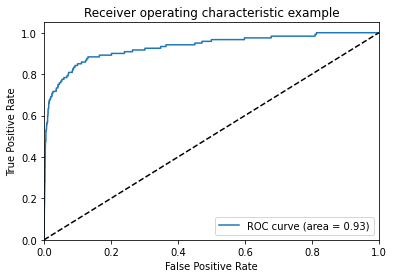

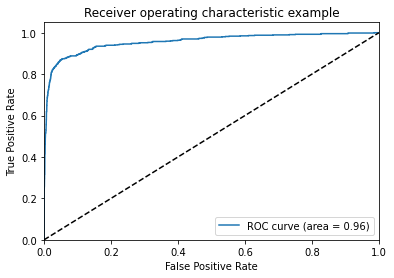

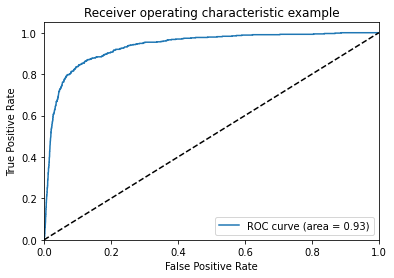

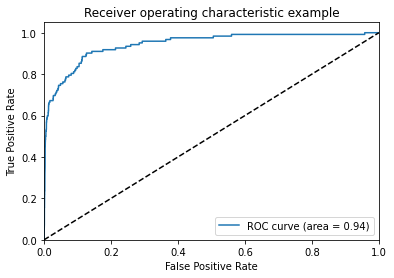

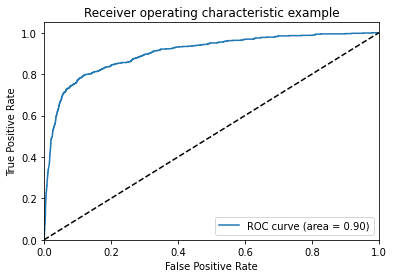

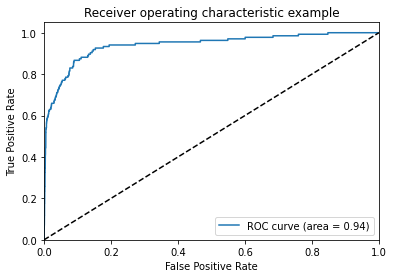

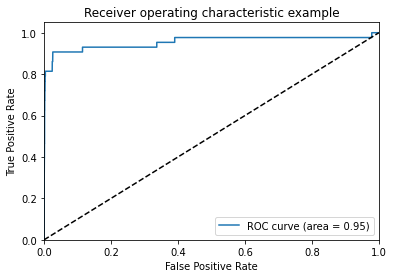

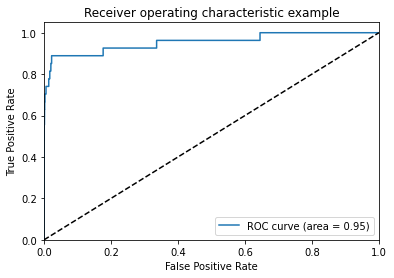

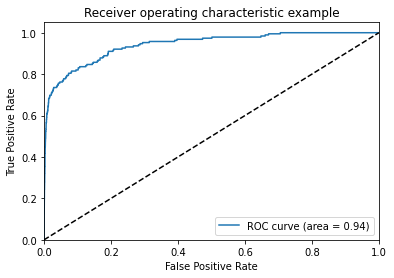

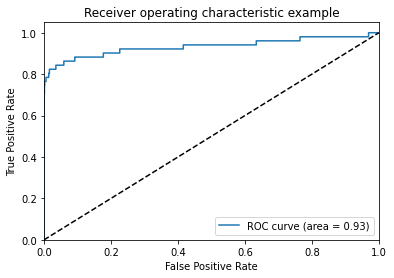

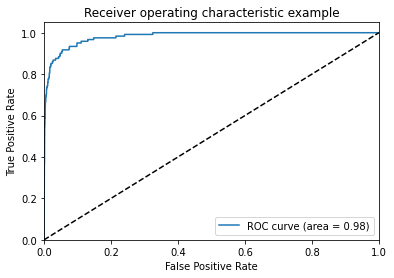

In [ ]:
for i in range(Y[0].shape[0]):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  from ipykernel import kernelapp as app


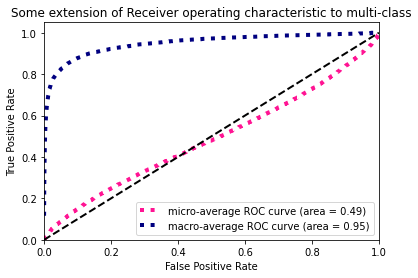

In [ ]:
#############Plot ROC curves for the multilabel problem
from scipy import interp
from itertools import cycle

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = numpy.unique(numpy.concatenate([fpr[i] for i in range(Y[0].shape[0])]))

# Then interpolate all ROC curves at this points
mean_tpr = numpy.zeros_like(all_fpr)
for i in range(Y[0].shape[0]):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= Y[0].shape[0]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(Y[0].shape[0]), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

In [ ]:
# clf_naive_bayes = BinaryRelevance(GaussianNB())
# clf_nb = clf_naive_bayes.fit(X_train,y_train)
# dump(clf_nb, 'clf_nb.joblib') 

In [ ]:
clf_nb = load('clf_nb.joblib') # Loading trained model

In [ ]:
y_pred_nb = clf_nb.predict(X_val)

In [ ]:
print('accuracy: ',accuracy_score(y_val, y_pred_nb))
print('f1: ',f1_score(y_val, y_pred_nb,average='weighted'))

print(classification_report(y_val, y_pred_nb))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
# forest = RandomForestClassifier(random_state=1)
# clf_multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
# clf_mtf = clf_multi_target_forest.fit(X_train, y_train)
# dump(clf_mtf, 'clf_mtf.joblib') 

In [ ]:
clf_mtf = load('clf_mtf.joblib') # Loading trained model

In [ ]:
y_pred_mtf = clf_mtf.predict(X_test)

In [ ]:
print('accuracy: ',accuracy_score(y_test, y_pred_mtf))
print('f1: ',f1_score(y_test, y_pred_mtf,average='weighted'))

print(classification_report(y_test, y_pred_mtf))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
dump(neigh, 'neigh_mtf_scaled.joblib') 

['neigh_mtf_scaled.joblib']

In [ ]:
neigh = load('neigh_mtf.joblib') # Loading trained model

In [ ]:
y_pred_neigh=neigh.predict(X_test)

In [ ]:
# All
for i in range(200):
  print('---------------------------')
  print(i)
  res = mlb.inverse_transform(numpy.array([y_pred_neigh[i]]))
  print(res)
  source = mlb.inverse_transform(numpy.array([y_val[i]]))
  print(source)

  if len(res[0])==0:
    print(y_pred_neigh[i])
    print(y_val[i])

---------------------------
0
[('کتاب',)]
[('کامپیوتر',)]
---------------------------
1
[()]
[('رابطکاربری',)]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
---------------------------
2
[()]
[('کتاب',)]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0]
---------------------------
3
[()]
[('استارتاپ',)]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
print('accuracy: ',accuracy_score(y_test, y_pred_neigh))
print('f1: ',f1_score(y_test, y_pred_neigh,average='weighted'))

print(classification_report(y_test, y_pred_neigh))

accuracy:  0.20030838239416876
f1:  0.26582590637675135
              precision    recall  f1-score   support

           0       0.47      0.20      0.28       112
           1       0.56      0.37      0.45       770
           2       0.50      0.11      0.18        18
           3       0.52      0.21      0.30       259
           4       0.40      0.11      0.17        18
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        16
           7       0.33      0.09      0.14       291
           8       0.40      0.03      0.06        60
           9       0.38      0.07      0.11        45
          10       0.12      0.02      0.03       104
          11       0.42      0.15      0.22       204
          12       1.00      0.29      0.44         7
          13       0.50      0.17      0.25        12
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        18
          16       0.33  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC was selected

## 5 - Set Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_SVC = load('clf_SVC.joblib') # Loading trained model

In [ ]:
parameters = {'estimator__kernel':('linear', 'rbf'), 'estimator__C':[1,10]}
final_clf = GridSearchCV(clf_SVC, parameters)
final_clf.get_params().keys()

In [ ]:
final_clf.fit(X_train,y_train)

In [ ]:
final_clf.cv_results_.keys()

## 6 - Test Model

In [ ]:
classification_rep=classification_report(y_test, y_pred)
print(classification_rep)
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred,average='macro')
recall_macro = recall_score(y_test, y_pred,average='macro')
f1score_macro=f1_score(y_test, y_pred,average='macro')

precision_weighted = precision_score(y_test, y_pred,average='weighted')
recall_weighted = recall_score(y_test, y_pred,average='weighted')
f1score_weighted =f1_score(y_test, y_pred,average='weighted')

#ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

with open("knn_evaluation.txt", "a") as file:
        file.write("Results:"+"\n" +
                   "classification report:\n"+classification_rep+"\n"
                   +"accuracy="+ str(accuracy)+"\n"
                   +"macro precision="+str(precision_macro)+"\n"
                   +"macro recall="+str(recall_macro)+"\n"
                   +"macro f-score="+str(f1score_macro)+"\n"
                   +"\n"
                   + "weighted precision=" + str(precision_weighted) + "\n"
                   + "weighted recall=" + str(recall_weighted) + "\n"
                   + "weighted f-score=" + str(f1score_weighted) + "\n"
                   )